# Group
# Timo Reents
# Timo Marks
# Sercan Dede
# Jonathan Hungerland
# Chinmay Chandratre

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Math
import pandas as pd

plt.style.use("default")

# Task A
## The probability density function $p(x|\theta)$ for this model is the sum of the two Gaussian pdf with the factors $\pi_1, \pi_2$ with $\pi_1+\pi_2=1$ so the integral over $p(x|\theta)$ is still 1.
# $p(x|\theta) = \pi_1 \frac{1}{\sqrt{2\pi\sigma_{c_1}²}} exp(-\frac{1}{2\sigma_{c_1}²}(x-\mu_{c_1})²) + \pi_2 \frac{1}{\sqrt{2\pi\sigma_{c_2}²}} exp(-\frac{1}{2\sigma_{c_2}²}(x-\mu_{c_2})²)$

In [84]:
# We want to have random samples. Therefore draw N numbers of uniform distribution and if the
# value is below 0.4 we draw a value from the first Gaussian and above from the second Gaussian

def gen_samples(N, pi, mu, sigma):
    
    assert all([len(l) == 2 for l in [pi, mu, sigma]]), "Lists need to have the length 2."
    
    randoms = np.random.random(N)
    samples = []
    for r in randoms:
        if r <= pi[0]: 
            samples.append(np.random.normal(mu[0], sigma[0], 1))
        else:
            samples.append(np.random.normal(mu[1], sigma[1], 1))
    
    return np.array(samples).flatten()
    
# Just the normal distribution    
def gaussian_pdf(x, mu, sigma):
    
    return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

# Combined Gaussian distribution
def pdf_combined(x, pi, mu, sigma):
    length = len(pi)
    assert all([len(l) == length for l in [pi, mu, sigma]]), "Lists need to have the same length."

    prob = 0
    for p, m, s in zip(pi, mu, sigma):
        prob += p * gaussian_pdf(x, m, s)
    
    return prob


# Task B

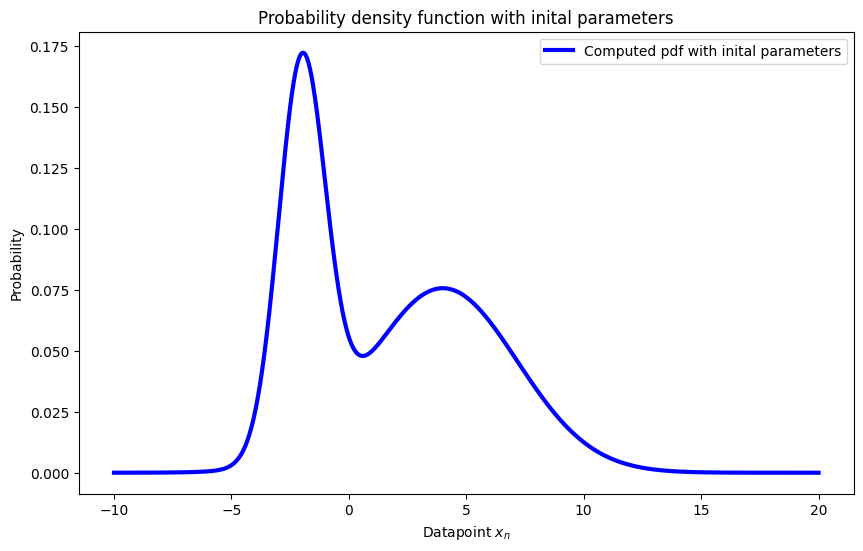

In [85]:
fig, ax = plt.subplots(1,1, figsize = (10,6))

# Parameters and x-parameters for line plot
x = np.linspace(-10, 20, 1000)
pi = [0.4, 0.6]
mu = [-2, 4]
sigma = [1, np.sqrt(10)]

# Compute pdf
pdf_task_b = pdf_combined(x, pi, mu, sigma)
ax.plot(x, pdf_task_b, c="b", lw=3, label="Computed pdf with inital parameters")
ax.set_xlabel("Datapoint $x_n$")
ax.set_ylabel("Probability")
ax.set_title("Probability density function with inital parameters")
ax.legend()
plt.show()

# Task C + D
## Scatter Plot and histograms of sampled data

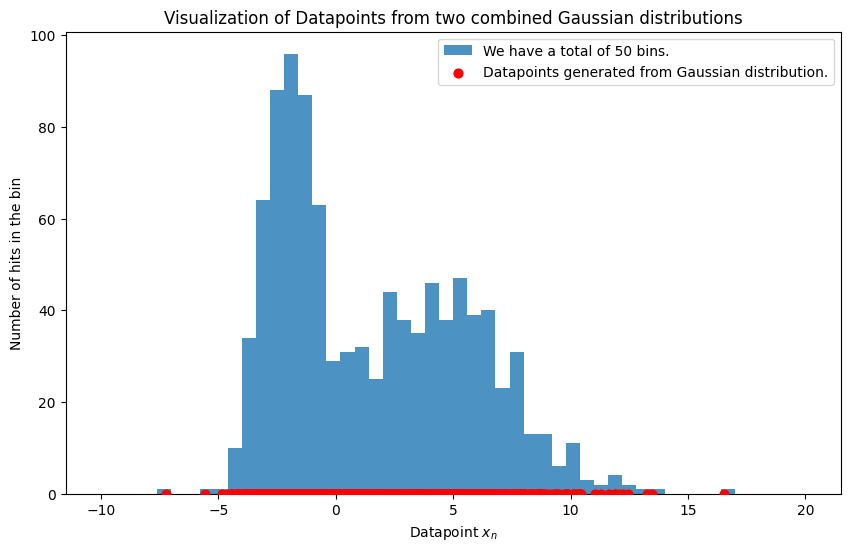

In [86]:
pi = [0.4, 0.6]
mu = [-2, 4]
sigma = [1, np.sqrt(10)]

fig, ax = plt.subplots(1,1, figsize = (10,6))
gaussian_combined_samples = gen_samples(1000, pi, mu, sigma)
y=np.zeros(len(gaussian_combined_samples))

# Create histogram of the distributed datapoints
bins = np.linspace(-10, 20, 51)
ax.scatter(gaussian_combined_samples, y, c="r", zorder=10, s=40, label="Datapoints generated from Gaussian distribution.")
ax.hist(gaussian_combined_samples, bins, alpha = 0.8, label=f"We have a total of {len(bins)-1} bins.")

ax.set_xlabel("Datapoint $x_n$")
ax.set_ylabel("Number of hits in the bin")
ax.set_title("Visualization of Datapoints from two combined Gaussian distributions")
ax.legend()
ax.set_ylim(bottom=-0.01)
plt.show()

# Task E
## The same as Task D but with normilized height of histogram

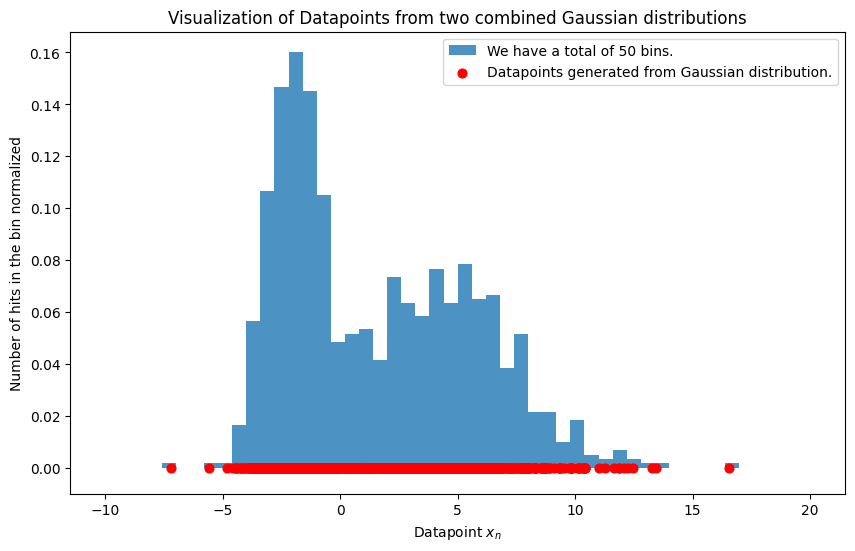

In [87]:
fig, ax = plt.subplots(1,1, figsize = (10,6))

# Create histogram of the distributed datapoints
ax.scatter(gaussian_combined_samples, y, c="r", zorder=10, s=40, label="Datapoints generated from Gaussian distribution.")
ax.hist(gaussian_combined_samples, bins, alpha = 0.8, density=True, label=f"We have a total of {len(bins)-1} bins.")

ax.set_xlabel("Datapoint $x_n$")
ax.set_ylabel("Number of hits in the bin normalized")
ax.set_title("Visualization of Datapoints from two combined Gaussian distributions")
ax.legend()
ax.set_ylim(bottom=-0.01)
plt.show()

# Task F
## The same as Task E but also with the pdf used in Task B
## The density approximation is better when you use more bins and more data points. With more bins you have a finer division of the x axis and more datapoints increases the possible accuracy in general

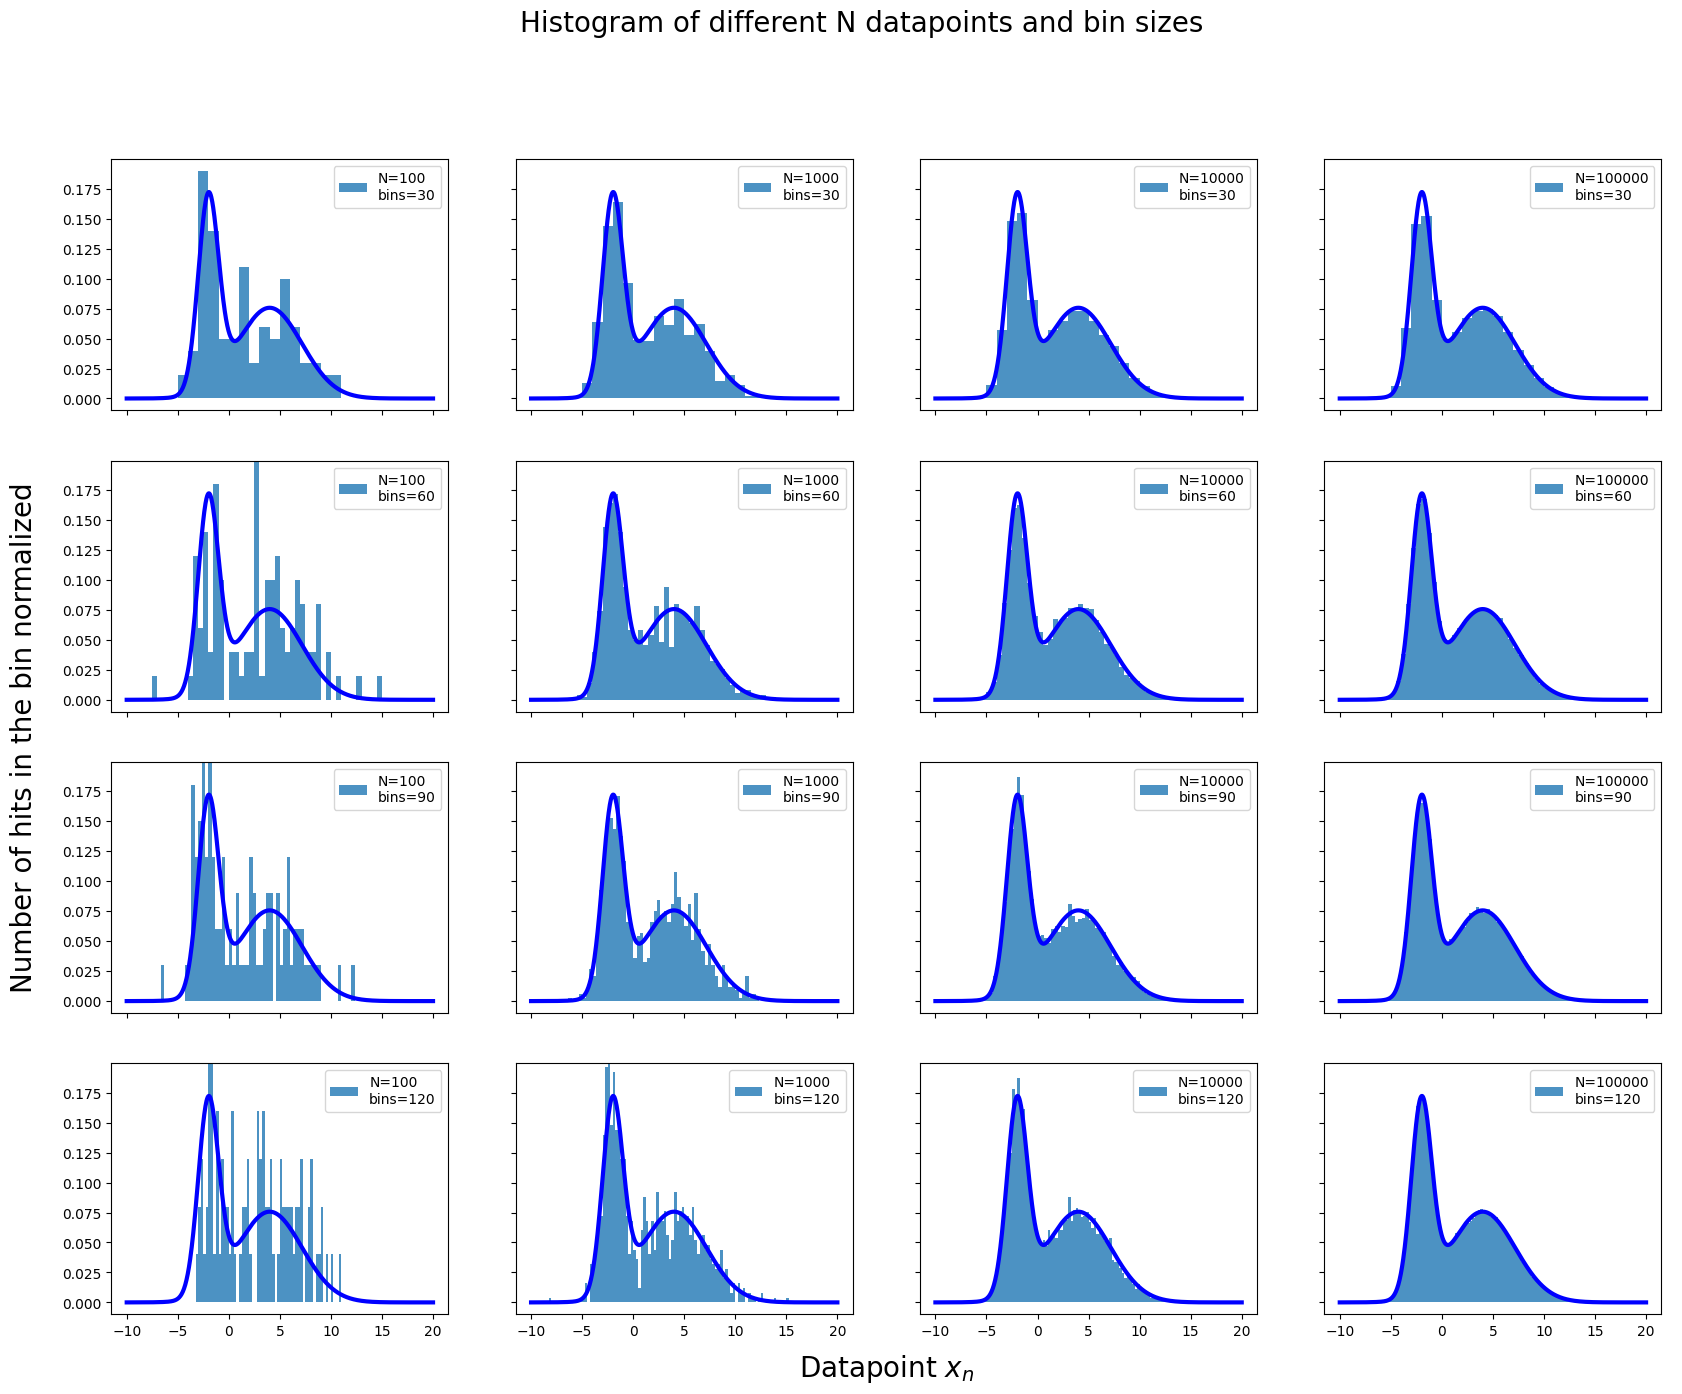

In [88]:
bins_num = [30, 60, 90, 120]
N_num = [100, 1000, 10000, 100_000]

fig, ax = plt.subplots(len(bins_num),len(N_num), sharex=True, sharey=True, figsize = (20, 15))

for i, b in enumerate(bins_num):
    for j, N in enumerate(N_num):
        # Create histogram of the distributed datapoints
        bins = np.linspace(-10, 20, b+1)
        gaussian_combined_samples = gen_samples(N, pi, mu, sigma)
        ax[i,j].hist(gaussian_combined_samples, bins, alpha = 0.8, density=True, label=f"N={N}\nbins={b}")
        ax[i,j].plot(x, pdf_task_b, c="b", lw=3)

        ax[i,j].legend()
        ax[i,j].set_ylim(bottom=-0.01)
plt.suptitle("Histogram of different N datapoints and bin sizes", fontsize=20)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Datapoint $x_n$", fontsize=20, labelpad=10)
plt.ylabel("Number of hits in the bin normalized", fontsize=20, labelpad=30) 
plt.show()


# Task G
# The general equation for the log likelyhood
# $log\ L(\theta) = \mathcal{L(\theta)} = \sum_{n=1}^{N}\ log[p(x_n|\theta)] = \sum_{n=1}^N\ \sum_{c=1}^C \ log[p(c|\theta)\ p(x|c,\theta)]$
# $\mathcal{L(\theta)} = \sum_{n=1}^N\ log [\pi_1 \frac{1}{\sqrt{2\pi\sigma_{c_1}²}} exp(-\frac{1}{2\sigma_{c_1}²}(x-\mu_{c_1})²) + \pi_2 \frac{1}{\sqrt{2\pi\sigma_{c_2}²}} exp(-\frac{1}{2\sigma_{c_2}²}(x-\mu_{c_2})²)]$

# Task H

In [89]:
def log_likelyhood(pdf_func, x, **kwargs):
    
    return np.log(pdf_func(x, **kwargs)).sum()


In [90]:
# Optimal parameters
pi_correct = [0.4, 0.6]
mu_correct = [-2, 4]
sigma_correct = [1, np.sqrt(10)]

# Correct parameters log likelyhood
dfs = []

for N in [100, 1000, 10000]:
    results = [] 
    gaussian_combined_samples = gen_samples(N, pi_correct, mu_correct, sigma_correct)
    log_likely = log_likelyhood(pdf_combined, gaussian_combined_samples, pi=pi_correct, mu=mu_correct, sigma=sigma_correct)
    results.append({f"N={N}: log likelyhood": np.round(log_likely,0), "Pi": str(np.round(pi_correct,2)), "Mu": str(np.round(mu_correct,2)), "Sigma": str(np.round(sigma_correct,2))})

    # Other parameters with some random noise
    random_pi = np.random.uniform(size=15)
    pi_vec = [[p, 1 - p] for p in random_pi]
    mu_vec = zip(np.random.uniform(-1, 1, 15) - 2, np.random.uniform(-1, 1, 15) + 4)
    sigma_vec = zip(np.random.uniform(-1, 1, 15) + 1, np.random.uniform(-1, 1, 15) + np.sqrt(10))

    # Compute the log likelyhood
    for pi, mu, sigma in zip(pi_vec, mu_vec, sigma_vec):
        log_likely = log_likelyhood(pdf_combined, gaussian_combined_samples, mu=mu, pi=pi, sigma=sigma)
        results.append({f"N={N}: log likelyhood": np.round(log_likely,0), "Pi": str(np.round(pi,2)), "Mu": str(np.round(mu,2)), "Sigma": str(np.round(sigma,2))})

    df_results = pd.DataFrame(results)
    df_results = df_results.set_index(f"N={N}: log likelyhood").sort_index(ascending=False)
    dfs.append(df_results)

# Print out dataframes
## As expected: The correct parameters have the best (highest) log likelyhood and parameters close to these correct ones give a better log likelyhood. Furthermore, the log likeleyhood increases if the number of datapoints increases because we sum up more values. If we increase the number of datapoints by 10 the log likelyhood also increases around a factor of 10.

In [91]:
for df in dfs:
    display(df)

,Pi,Mu,Sigma
N=100: log likelyhood,,,
-252.0,[0.4 0.6],[-2 4],[1. 3.16]
-253.0,[0.44 0.56],[-1.73 4.8 ],[0.74 2.84]
-258.0,[0.27 0.73],[-1.51 3.35],[1.08 2.78]
-260.0,[0.18 0.82],[-1.92 3.25],[1.24 3.35]
-264.0,[0.59 0.41],[-1.97 4.85],[1.72 2.81]
-267.0,[0.2 0.8],[-1.58 3.05],[1.83 3.08]
-269.0,[0.38 0.62],[-1.04 4.64],[0.84 2.88]
-270.0,[0.29 0.71],[-2.63 4.11],[1.9 2.61]
-272.0,[0.13 0.87],[-1.93 3.49],[0.19 3.53]


,Pi,Mu,Sigma
N=1000: log likelyhood,,,
-2583.0,[0.4 0.6],[-2 4],[1. 3.16]
-2687.0,[0.29 0.71],[-1.86 4.63],[1.62 3.26]
-2698.0,[0.58 0.42],[-1.77 3.73],[1.91 3.15]
-2704.0,[0.67 0.33],[-1.69 4.85],[1.48 3.66]
-2723.0,[0.42 0.58],[-2.8 4.45],[1.71 3.55]
-2740.0,[0.41 0.59],[-1.63 3.23],[0.42 3.39]
-2763.0,[0.7 0.3],[-1.98 4.33],[1.47 3.93]
-2763.0,[0.4 0.6],[-1.22 3.59],[1.75 2.31]
-2781.0,[0.45 0.55],[-1.04 3.39],[1.07 2.45]


,Pi,Mu,Sigma
N=10000: log likelyhood,,,
-26071.0,[0.4 0.6],[-2 4],[1. 3.16]
-26241.0,[0.49 0.51],[-1.79 3.87],[1.16 2.95]
-27702.0,[0.63 0.37],[-2.47 4.67],[0.92 3.63]
-27721.0,[0.21 0.79],[-2.42 4.35],[1.96 4.02]
-27966.0,[0.26 0.74],[-2.89 3.09],[0.38 3.37]
-28115.0,[0.11 0.89],[-2.73 4.49],[0.64 3.89]
-28359.0,[0.7 0.3],[-2.54 4.73],[0.99 2.56]
-31199.0,[0.03 0.97],[-2.89 3.67],[1. 2.54]
-31256.0,[0.65 0.35],[-1.44 3.72],[0.58 2.17]
